<a href="https://colab.research.google.com/github/ribollequis87/logica_mat_discreta/blob/main/MIDTERM_REVIEW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**MIDTERM REVIEW**

#**CLASS#01 - PROGRAM GRAPHS**

In [ ]:
!pip install flloat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.5/103.5 KB 6.2 MB/s eta 0:00:00


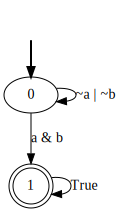

In [ ]:
from flloat.parser.ltlf import LTLfParser

# parse the formula
parser = LTLfParser()
formula = "F (a & b)"
parsed_formula = parser(formula)
dfa = parsed_formula.to_automaton()
graph = dfa.to_graphviz()
graph

In [ ]:
from pickle import TRUE
test = [{"a": True, "b": True}]
assert parsed_formula.truth(test)

In [ ]:
assert dfa.accepts(test)

**EXERCISE**

Consider the following statement: "if the weather today is cloudy or windy, then tomorrow will rain or be cloudy". Implement a fórmula for this and evaluate every possible test.

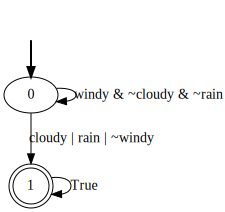

In [ ]:
#TYPE YOUR IMPLEMENTATION HERE, generating a program graph g.

parser = LTLfParser()
formula = "F ((cloudy | windy)->(rain | cloudy))"
parsed_formula = parser(formula)
dfa = parsed_formula.to_automaton()
g = dfa.to_graphviz()
g

In [ ]:
#TEST YOUR IMPLEMENTATION HERE BEFORE SUBMITTING IT
test = [{"cloudy": False,"windy":False, "rain": False}]
assert dfa.accepts(test)

#**CLASS 02 - PROPOSITIONAL LOGIC/CALCULUS**

The following outlines a standard propositional calculus. Many different formulations exist which are all more or less equivalent, but differ in the details of:

*   their language (i.e., the particular collection of primitive symbols and operator symbols)
*   the set of axioms, or distinguished formulas, and
*   the set of inference rules



Any given proposition may be represented with a letter called a 'propositional constant', analogous to representing a number by a letter in mathematics (e.g., a = 5). All propositions require exactly one of two truth-values: true or false. For example, let P be the proposition that it is raining outside. This will be true (P) if it is raining outside, and false otherwise (¬P).


* We then define truth-functional operators, beginning with **negation**. ¬P represents the negation of P, which can be thought of as the denial of P. In the example above, ¬P expresses that it is not raining outside, or by a more standard reading: "It is not the case that it is raining outside." When P is true, ¬P is false; and when P is false, ¬P is true. As a result, ¬ ¬P always has the same truth-value as P.

* **Conjunction** is a truth-functional connective which forms a proposition out of two simpler propositions, for example, P and Q. The conjunction of P and Q is written P ∧ Q, and expresses that each are true. We read P ∧ Q as "P and Q". For any two propositions, there are four possible assignments of truth values:

        P is true and Q is true
        P is true and Q is false
        P is false and Q is true
        P is false and Q is false


* **Disjunction** resembles conjunction in that it forms a proposition out of two simpler propositions. We write it P ∨ Q, and it is read "P or Q". It expresses that either P or Q is true. Thus, in the cases listed above, the disjunction of P with Q is true in all cases—except case 4. Using the example above, the disjunction expresses that it is either raining outside, or there is a cold front over Kansas. (Note, this use of disjunction is supposed to resemble the use of the English word "or". However, it is most like the English inclusive "or", which can be used to express the truth of at least one of two propositions. It is not like the English exclusive "or", which expresses the truth of exactly one of two propositions. In other words, the exclusive "or" is false when both P and Q are true (case 1), and similarly is false when both P and Q are false (case 4). An example of the exclusive or is: You may have a bagel or a pastry, but not both. Often in natural language, given the appropriate context, the addendum "but not both" is omitted—but implied. In mathematics, however, "or" is always inclusive or; if exclusive or is meant it will be specified, possibly by "xor".)

* **Conditional** also joins two simpler propositions, and we write P → Q, which is read "if P then Q". The proposition to the left of the arrow is called the antecedent, and the proposition to the right is called the consequent. (There is no such designation for conjunction or disjunction, since they are commutative operations.) It expresses that Q is true whenever P is true. Thus P → Q is true in every case above except case 2, because this is the only case when P is true but Q is not. Using the example, if P then Q expresses that if it is raining outside, then there is a cold-front over Kansas. The material conditional is often confused with physical causation. The material conditional, however, only relates two propositions by their truth-values—which is not the relation of cause and effect. It is contentious in the literature whether the material implication represents logical causation.
    
    
* **Biconditional** joins two simpler propositions, and we write P ↔ Q, which is read "P if and only if Q". It expresses that P and Q have the same truth-value, and in cases 1 and 4. 'P is true if and only if Q' is true, and is false otherwise.

Using the module FLLOAT, verify the Negation introduction: from ( p → q ) and ( p → ¬ q ) , infer ¬ p.

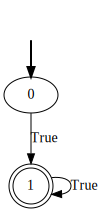

In [ ]:
from flloat.parser.ltlf import LTLfParser

# parse the formula
parser = LTLfParser()
formula = "F (((p->q) & (p->!q))->!p)"
parsed_formula = parser(formula)
dfa = parsed_formula.to_automaton()
graph = dfa.to_graphviz()
graph

**EXERCISE**

Biconditional introduction: from ( p → q ) and ( q → p ) , infer ( p ↔ q ).

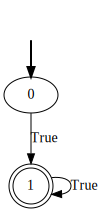

In [ ]:
parser = LTLfParser()
formula = "F (((p->q) & (q->p))->(p<->q))"
parsed_formula = parser(formula)
dfa = parsed_formula.to_automaton()
graph = dfa.to_graphviz()
graph

#**CLASS 03 - LINEAR TEMPORAL LOGIC (LTL) - PART I**

In LTL we have three unitary operators:

<table>
  <tr>
    <th>Operator</th>
    <th>Meaning</th>
  </tr>
  <tr>
    <td>Xψ</td>
    <td>neXt: ψ has to hold at the next state</td>
  </tr>
  <tr>
    <td>Fψ</td>
    <td>Finally: ψ eventually has to hold (somewhere on the subsequent path)</td>
  </tr>

  <tr>
    <td>Gψ</td>
    <td>Globally: ψ has to hold on the entire subsequent path</td>
    <td> </td>
  </tr>
</table>

The graphical interpretation of these 3 operators is depicted below:

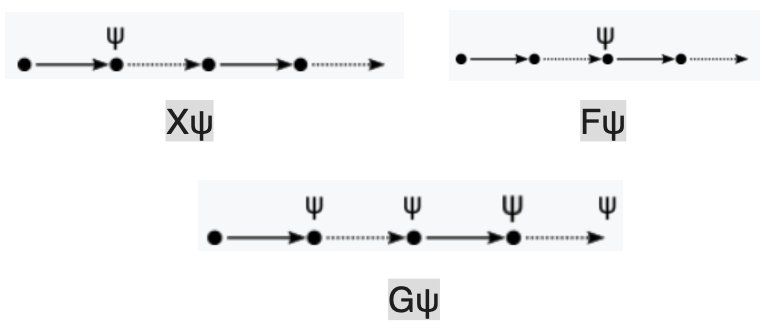


Using the module FLLOAT, prove the identity X (φ ∨ ψ) ≡ (X φ) ∨ (X ψ)

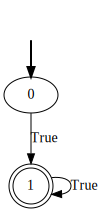

In [ ]:
from flloat.parser.ltlf import LTLfParser

# parse the formula
parser = LTLfParser()
formula = "F (X(fi|psi)->X(fi)|X(psi))"
parsed_formula = parser(formula)
dfa = parsed_formula.to_automaton()
graph = dfa.to_graphviz()
graph

In [ ]:
from pickle import TRUE
test = [{"fi": False, "psi": False},
        {"fi": False, "psi": True},
        {"fi": True, "psi": False},
        {"fi": True, "psi": True}]
assert dfa.accepts(test)

**EXERCISE**

Using the module FLLOAT, prove the following identity and test it:

F φ ≡ F F φ

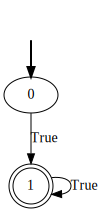

In [ ]:
parser = LTLfParser()
formula = "F (F(phi)->F(F(phi)))"
parsed_formula = parser(formula)
dfa = parsed_formula.to_automaton()
graph = dfa.to_graphviz()
graph

#**CLASS 04 - LINEAR TEMPORAL LOGIC (LTL) - PART II**

In LTL we have four binary operators:

<table>
  <tr>
    <th>Operator</th>
    <th>Meaning</th>
  </tr>
  <tr>
    <td>ψUφ</td>
    <td>Until: ψ has to hold at least until φ becomes true, which must hold at the current or a future position.
  </tr>
  
  <tr>
    <td>ψWφ</td>
    <td>Weak until: ψ has to hold at least until φ; if φ never becomes true, ψ must remain true forever.
  </tr>

  <tr>
    <td>ψMφ</td>
    <td>Strong release: φ has to be true until and including the point where ψ first becomes true, which must hold at the current or a future position.
  </tr>

<tr>
    <td>ψRφ</td>
    <td>Release: φ has to be true until and including the point where ψ first becomes true; if ψ never becomes true, φ must remain true forever.
  </tr>

  
</table>

In the next figure, one can view a graphical comparison among these operators:

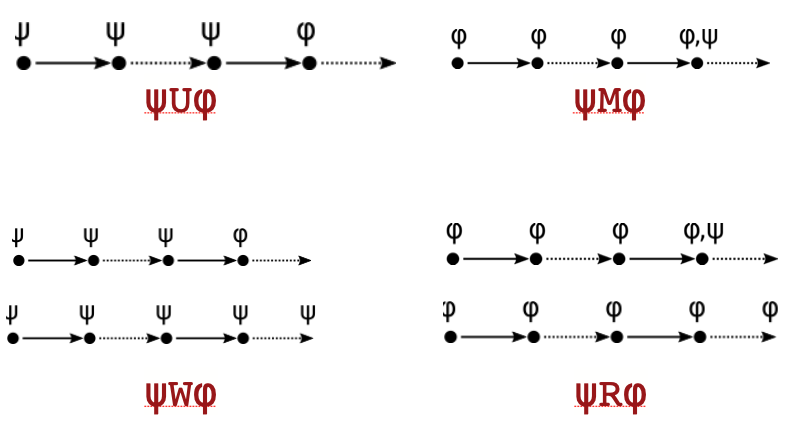


**EXERCISE**

Using the module FLLOAT, interpret and prove the following identity and test it:

φ U ψ ≡ φ U (φ U ψ)

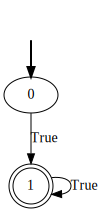

In [ ]:
parser = LTLfParser()
formula = "F ((phi U psi)-> (phi U(phi U psi)))"
parsed_formula = parser(formula)
dfa = parsed_formula.to_automaton()
graph = dfa.to_graphviz()
graph

In [ ]:
test = [{"fi": False, "psi": False},
        {"fi": False, "psi": True},
        {"fi": True, "psi": False},
        {"fi": True, "psi": True}]
assert dfa.accepts(test)

#**CLASS 05 - LINEAR TEMPORAL LOGIC (LTL) - PART III**

A Kripke structure is a **directed graph**, equipped with a set of initial nodes, such that **every node** is source of some edge and it **is labeled by a set of atomic propositions**. The nodes of Kripke structure are called states:

A Kripke structure is a tuple (𝑆,𝑆0,𝑅,𝐿) such that:

* 𝑆 is a finite set of states
* 𝑆0⊆𝑆 is a set of initial states
* 𝑅⊆𝑆×𝑆 is a set of transitions such that for all 𝑠∈𝑆 there exists a (𝑠,𝑠′)∈𝑅 for some 𝑠′∈𝑆
* 𝐿:𝑆→2^{AP} maps each state into a set of atomic propositions. Sometimes, the set of initial states is omitted. In such cases, 𝑆 and 𝑆0 coincide.

A computation of a Kripke structure (𝑆,𝑆0,𝑅,𝐿) is an infinite path of (𝑆,𝑅) that starts from some 𝑠∈𝑆0. In the following code we are specifying a Kripke structure using the Python module pyModelChecking.

Model checking is a technique to establish the set of states in Kripke structure that satisfy a given temporal formula. More formally, provided a Kripke structure 𝐾=(𝑆,𝑆0,𝑅,𝐿) and a temporal formula 𝜑, model checking aims to identify 𝑆′⊆𝑆 such that 𝐾,𝑠𝑖⊨𝜑 for all 𝑠𝑖∈𝑆′.

In [ ]:
!pip install pyModelChecking

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 KB 3.4 MB/s eta 0:00:00


In [ ]:
from pyModelChecking import *
from pyModelChecking.LTL import *

K=Kripke(R=[(0,0),(0,1),(1,2),(2,2),(3,3)], L={0: set(['p']), 1:set(['p','q']),3:set(['p'])})
modelcheck(K,'A (not q)')

{0, 2, 3}

**EXERCISE**

Implement a Kripke Structure for the following Python program and check some formulas:

V=[4,2,5,6,8]

max=0

for i in range(size(V)):

    if V[i]>max:

      max=V[i]

In [ ]:
K=Kripke(R=[(0,1),(1,2),(2,3),(3,2)], L={1:set(['v0_4','v1_2','v2_5','v3_6','v4_8']),
                                         2:set(['max_m_0','v0_4','v1_2','v2_5','v3_6','v4_8']),
                                         3:set(['max_m_0','v0_4','v1_2','v2_5','v3_6','v4_8'])})

In [ ]:
modelcheck(K,'A (not max_m_0)')

{0, 1}

#**CLASS 06 - LINEAR TEMPORAL LOGIC (LTL) - PART IV**

pyModelChecking provides a user friendly support for building CTL*, CTL and LTL formulas. Each of these languages corresponds to a pyModelChecking’s sub-module which implements all the classes required to encode the corresponding formulas.

Propositional logic is also supported by pyModelChecking as a shared basis for all the possible temporal logics.

Propositional logics support is provided by including the pyModelChecking.language sub-module. This sub-module allows to represents atomic propositions and Boolean values through the pyModelChecking.formula.AtomicProposition and pyModelChecking.formula.Bool classes, respectively.

In [ ]:
from pyModelChecking.PL import *
p = Parser()
print(p.grammar)



        s_formula: "true"     -> true
                 | "false"    -> false
                 | a_prop
                 | "(" s_formula ")"

        u_formula: ("not"|"~") u_formula  -> not_formula
                 | "(" b_formula ")"
                 | s_formula

        b_formula: u_formula
                 | u_formula ( ("or"|"|") u_formula )+ -> or_formula
                 | u_formula ( ("and"|"&") u_formula )+ -> and_formula
                 | u_formula ("-->") u_formula -> imply_formula

        a_prop: /[a-zA-Z_][a-zA-Z_0-9]*/ -> string
              | ESCAPED_STRING           -> e_string

        formula: b_formula

        %import common.ESCAPED_STRING
        %import common.WS
        %ignore WS
        


**EXERCISE**

Consider the arcade game Pac-Man. Model the pacman as a Kripke Structure and check some tests.

In [ ]:
K=Kripke(R=[(0,0),(0,1),(0,2),(0,3),
            (1,0),(1,1),(1,3),
            (2,0),(2,1),(2,2), (3,3)], L={0: set(['walking']), 1:set(['hunted']),
                                          2:set(['power']), 3:set(['died'])})

In [ ]:
modelcheck(K,'A(power & died)')

set()